In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def Plot_confusion_matrix(y, y_predict):
    cnof_matrix = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cnof_matrix, ax= ax, annot= True)
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["did not land", "land"])
    ax.yaxis.set_ticklabels(["did not land", "landed"])

In [3]:
data = pd.read_csv("dataset_falcon9.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
data.iloc[0, 1]

'2010-06-04'

In [5]:
Preprocessed = pd.read_csv("preprocessed_dataset.csv")
Preprocessed.head()

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int64  
 4   Reused                               90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int64  
 10  Orbit_GEO                            90 non-null     int64  
 11  Orbit_GTO                         

In [7]:
X = Preprocessed.drop("Class", axis= 1)
y = Preprocessed["Class"]

In [8]:
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,15400.000000,2,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,86,15400.000000,3,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,87,15400.000000,6,1,1,1,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,88,15400.000000,3,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: Class, Length: 90, dtype: int64

In [10]:
X["PayloadMass"].mean()

6104.959411764707

In [11]:
X["PayloadMass"].std()

4694.671719712727

In [12]:
X["Flights"].mean()

1.788888888888889

In [13]:
X["Flights"].std()

1.2131715741866367

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


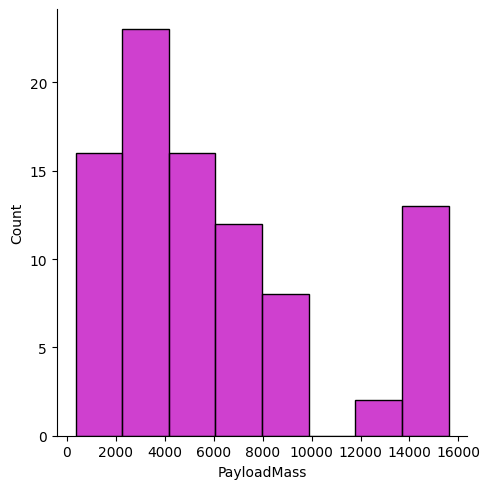

In [14]:
sns.displot(data= X, x= "PayloadMass", color= "m")

In [15]:
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)
X_scaled

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [16]:
col = X.columns
X = pd.DataFrame(X_scaled, columns= col)
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.712912,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.674419,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.635927,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.597434,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-1.558942,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.597434,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.635927,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.674419,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


In [17]:
X["PayloadMass"].mean()

-1.4186183092432555e-16

In [18]:
X["PayloadMass"].std()

1.0056022847309865

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


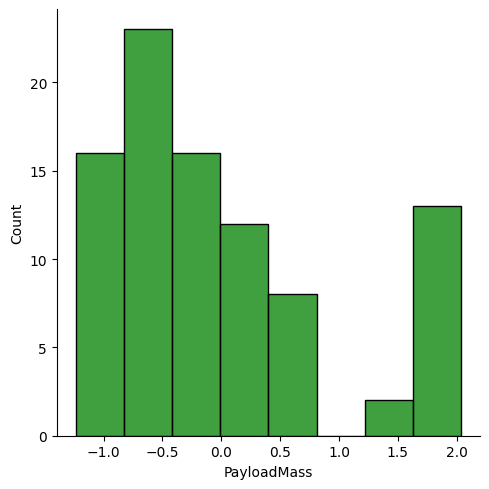

In [19]:
sns.displot(data= X, x= "PayloadMass", color= "g")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)

***Logistic Regression***

In [21]:
lr = LogisticRegression()

In [22]:
parameters_log = {"C": [0.01,0.1,1],
                  "penalty": ["l2"], 
                  "solver": ["lbfgs"]}

log_reg_CV = GridSearchCV(lr, parameters_log, cv= 4)
log_reg_CV.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [23]:
print("tuned hpyerparameters :(best parameters) ", log_reg_CV.best_params_)
print(f"accuracy : {log_reg_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.875


In [24]:
accu = []
methods = []
accu.append(log_reg_CV.score(X_test, y_test))
methods.append("LogisticRegression")

In [25]:
log_reg_CV.score(X_test, y_test)

0.8888888888888888

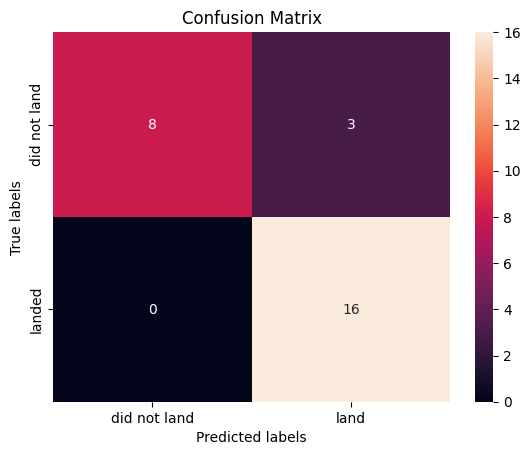

In [26]:
y_predict_log = log_reg_CV.predict(X_test)
Plot_confusion_matrix(y_test, y_predict_log)

***Support Vector Machine***

In [27]:
svm = SVC()

In [28]:
parameters_svm = {"kernel": ("linear", "rbf","poly","rbf", "sigmoid"),
                  "C": (0.5, 1, 1.5)}

In [29]:
svm_CV = GridSearchCV(svm, parameters_svm, cv= 10)
svm_CV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [30]:
print("tuned hpyerparameters :(best parameters) ", svm_CV.best_params_)
print(f"accuracy : {svm_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'sigmoid'}
accuracy : 0.9380952380952381


In [31]:
accu.append(svm_CV.score(X_test, y_test))
methods.append("Supoprt Vector Machine")

In [32]:
svm_CV.score(X_test, y_test)

0.8888888888888888

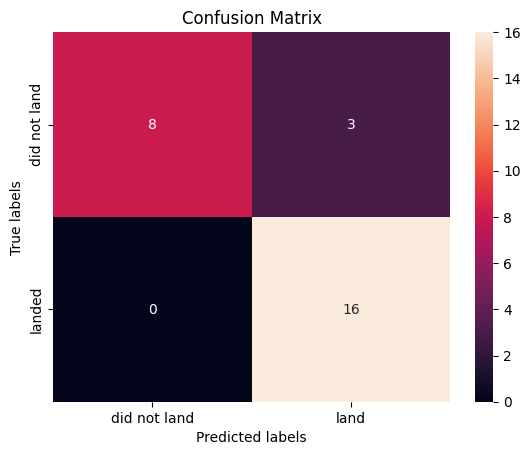

In [33]:
y_predict_svm = svm_CV.predict(X_test)
Plot_confusion_matrix(y_test, y_predict_svm)

***Decision Trees***

In [34]:
parameters_tree = {"criterion": ["gini", "entropy"],
                   "splitter": ["best", "random"],
                   "max_depth": [2 * n for n in range(1, 10)],
                   "max_features": ["auto", "sqrt"],
                   "min_samples_leaf": [1, 2, 4],
                   "min_samples_split": [2, 5, 10]}

In [35]:
tree = DecisionTreeClassifier()

In [36]:
tree_CV = GridSearchCV(tree, parameters_tree, cv= 10)
tree_CV.fit(X_train, y_train)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [37]:
print("tuned hpyerparameters :(best parameters) ", tree_CV.best_params_)
print(f"accuracy : {tree_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.9523809523809523


In [38]:
accu.append(tree_CV.score(X_test, y_test))
methods.append("Decision Tree Classifier")

In [39]:
tree_CV.score(X_test, y_test)

0.9259259259259259

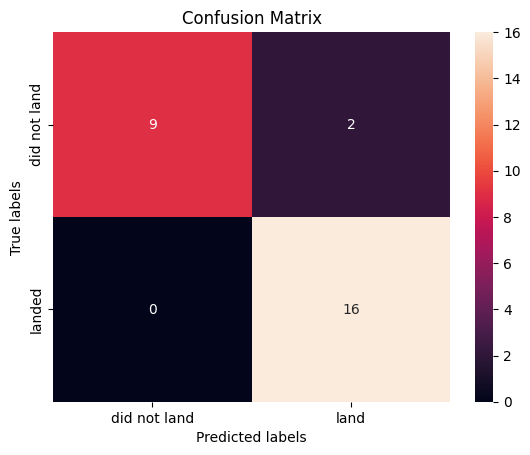

In [40]:
y_predict_tree = tree_CV.predict(X_test)
Plot_confusion_matrix(y_test, y_predict_tree)

***K Nearest Neighbors***

In [41]:
parameters_knn = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                  "p": [1, 2]}

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn_CV = GridSearchCV(knn, parameters_knn, cv= 10)
knn_CV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [44]:
print("tuned hpyerparameters :(best parameters) ", knn_CV.best_params_)
print(f"accuracy : {knn_CV.best_score_}")

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8928571428571429


In [45]:
accu.append(knn_CV.score(X_test, y_test))
methods.append("K Nearest neighbors")

In [46]:
knn_CV.score(X_test, y_test)

0.8518518518518519

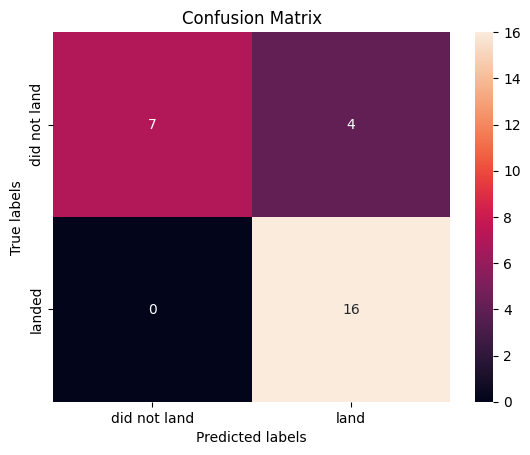

In [47]:
y_predict_knn = knn_CV.predict(X_test)
Plot_confusion_matrix(y_test, y_predict_knn)

***Find the method performs best:***

In [48]:
print(f"methods : {methods}")
print(f"accuray : {accu}")

methods : ['LogisticRegression', 'Supoprt Vector Machine', 'Decision Tree Classifier', 'K Nearest neighbors']
accuray : [0.8888888888888888, 0.8888888888888888, 0.9259259259259259, 0.8518518518518519]


Text(0.5, 1.0, 'Best Perfomed Method')

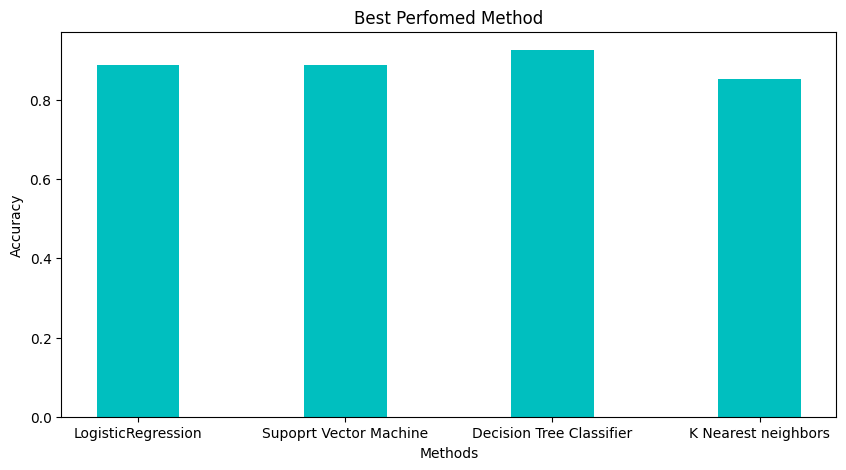

In [49]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(methods, accu, color = "c", width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")

Text(0.5, 1.0, 'Area Under ROC')

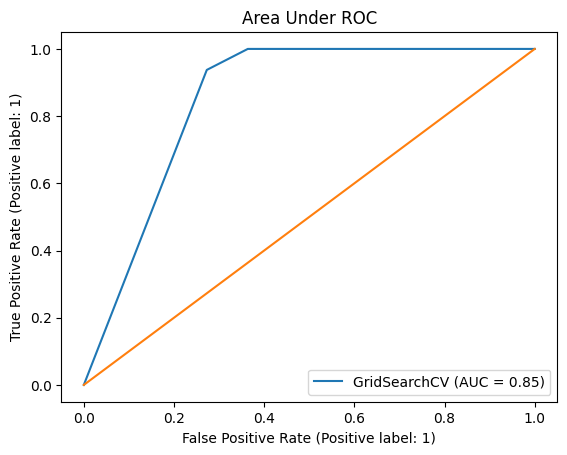

In [50]:
RocCurveDisplay.from_estimator(knn_CV, X_test, y_test)
plt.plot([0, 1],[0, 1])
plt.title("Area Under ROC")

<Axes: xlabel='Class', ylabel='count'>

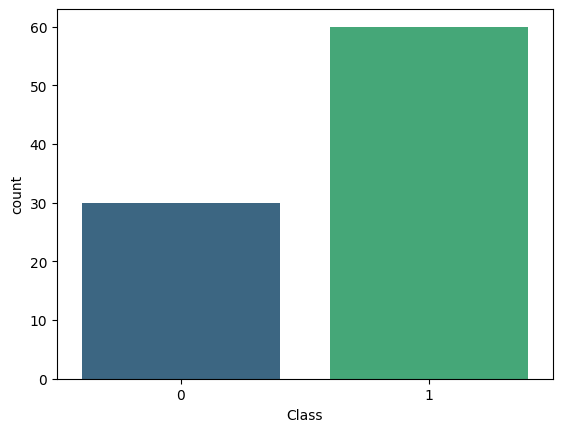

In [51]:
sns.countplot(data = data, x = "Class", palette= "viridis")